### Graphiques (hyperparameters...)

In [ ]:

import matplotlib.pyplot as plt
for i in range(len(hist)):
    # plt.plot(hist[i].history["accuracy"])
    plt.plot(hist[i].history["val_accuracy"])
plt.legend(['Adam', 'RMSprop', 'SGD'], loc='upper left')
plt.title("model accuracy")
plt.ylabel("validation accuracy")
plt.xlabel("epoch")
# plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def LSTM_train_model(X_train, y_train, epoch, batch_size, validation_split, num_classes, optimizers, n_mfcc=13):
    histories = []
    for optimizer in optimizers:
        model = Sequential()
        model.add(LSTM(128, input_shape=(n_mfcc, max_length)))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = validation_split, use_multiprocessing=True)
        histories.append(history)

    for i in range(len(histories)):
        plt.plot(histories[i].history["val_accuracy"])
    plt.legend(optimizers, loc='upper left')
    plt.title("model accuracy")
    plt.ylabel("validation accuracy")
    plt.xlabel("epoch")
    plt.show()


In [ ]:
optimizers = ["Adadelta", "Adagrad", "Adam", "Adamax", "Ftrl", "Nadam", "RMSprop", "SGD"]
LSTM_train_model(X_train, y_train, epoch = 20, batch_size = 96, validation_split = 0.05, num_classes = num_classes, optimizers = optimizers, n_mfcc=13)

Epoch 1/20
118/118 [==============================] - 16s 88ms/step - loss: 1.8818 - accuracy: 0.1696 - val_loss: 1.8662 - val_accuracy: 0.1775
Epoch 2/20
118/118 [==============================] - 9s 74ms/step - loss: 1.8795 - accuracy: 0.1702 - val_loss: 1.8644 - val_accuracy: 0.1775
Epoch 3/20
118/118 [==============================] - 9s 73ms/step - loss: 1.8775 - accuracy: 0.1711 - val_loss: 1.8628 - val_accuracy: 0.1783
Epoch 4/20
118/118 [==============================] - 9s 80ms/step - loss: 1.8755 - accuracy: 0.1714 - val_loss: 1.8613 - val_accuracy: 0.1799
Epoch 5/20
118/118 [==============================] - 15s 124ms/step - loss: 1.8737 - accuracy: 0.1720 - val_loss: 1.8598 - val_accuracy: 0.1815
Epoch 6/20
118/118 [==============================] - 10s 86ms/step - loss: 1.8719 - accuracy: 0.1725 - val_loss: 1.8584 - val_accuracy: 0.1831
Epoch 7/20
118/118 [==============================] - 10s 86ms/step - loss: 1.8702 - accuracy: 0.1736 - val_loss: 1.8571 - val_accuracy: 0

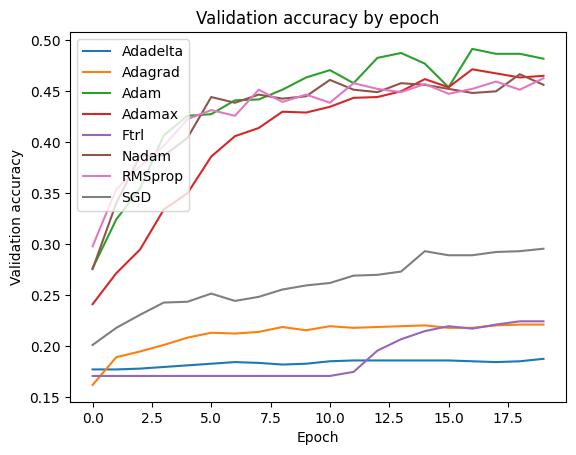

In [ ]:
import matplotlib.pyplot as plt

n_mfcc=13
optimizers = ["Adadelta", "Adagrad", "Adam", "Adamax", "Ftrl", "Nadam", "RMSprop", "SGD"]
histories = []
for optimizer in optimizers:
    model = Sequential()
    model.add(LSTM(128, input_shape=(n_mfcc, max_length)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=96, validation_split=0.1, use_multiprocessing=True)
    histories.append(history)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("Test accuracy of model with {} optimizer: {:.4f}".format(optimizer, test_acc))

plt.figure()
for i in range(len(histories)):
    plt.plot(histories[i].history["val_accuracy"])
plt.legend(optimizers, loc='upper left')
plt.title("Validation accuracy by epoch")
plt.ylabel("Validation accuracy")
plt.xlabel("Epoch")
plt.show()
# This code will plot the validation accuracy of each model during each epoch, as well as print the accuracy of X_test for each optimizer after training the models.






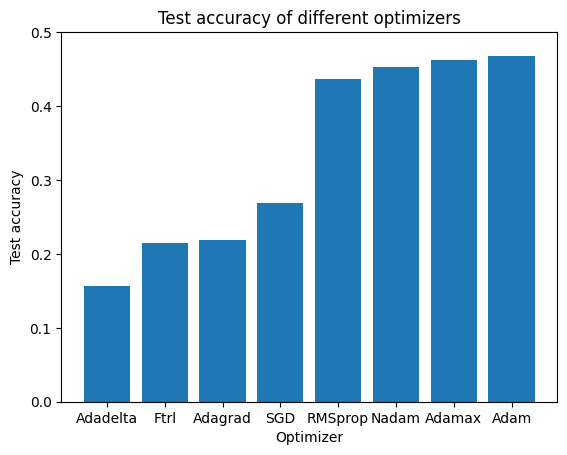

In [ ]:
test_accuracies = ["0.1567","0.2193","0.4673","0.4623","0.2150","0.4522","0.4371","0.2682"]
optimizers = ["Adadelta", "Adagrad", "Adam", "Adamax", "Ftrl", "Nadam", "RMSprop", "SGD"]

# Convert the test_accuracies to float
test_accuracies = [float(acc) for acc in test_accuracies]

# Zip the optimizers and test_accuracies together and sort the list of tuples based on the test_accuracies
optimizers_and_accuracies = sorted(zip(optimizers, test_accuracies), key=lambda x: x[1])

# Unzip the sorted list of tuples
optimizers, test_accuracies = zip(*optimizers_and_accuracies)

plt.bar(optimizers, test_accuracies)
plt.title("Test accuracy of different optimizers")
plt.xlabel("Optimizer")
plt.ylabel("Test accuracy")
plt.ylim(0, 0.5)
# plt.yticks(sorted(test_accuracies))
plt.show()

### Fonction entrainement modèle, cacul accuracy, plot validation accuracy by epoch and test accuracy for different hyperparameters

In [ ]:
import matplotlib.pyplot as plt

def LSTM_train_model_plot(X_train, y_train, epoch, batch_size, validation_split, num_classes, optimizers, n_mfcc=13):
    histories = []
    test_accuracies = []
    for optimizer in optimizers:
        model = Sequential()
        model.add(LSTM(128, input_shape=(n_mfcc, max_length)))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = validation_split, use_multiprocessing=True)
        histories.append(history)
        test_loss, test_acc = model.evaluate(X_test, y_test)
        print("Test accuracy of model with {} optimizer: {:.4f}".format(optimizer, test_acc))
        test_accuracies.append(test_acc)
        


    for i in range(len(histories)):
        plt.plot(histories[i].history["val_accuracy"])
    plt.legend(optimizers, loc='upper left')
    plt.title("model accuracy")
    plt.ylabel("validation accuracy")
    plt.xlabel("epoch")
    plt.show()

    # plt.bar(optimizers, test_accuracies)
    # plt.title("Test accuracy of different optimizers")
    # plt.xlabel("Optimizer")
    # plt.ylabel("Test accuracy")
    # plt.show()
    
    return histories, test_accuracies
    

### On va tester pour Adam avec des learning_rates différents

Epoch 1/20
124/124 [==============================] - 19s 94ms/step - loss: 1.7563 - accuracy: 0.2427 - val_loss: 1.7039 - val_accuracy: 0.2748
Epoch 2/20
124/124 [==============================] - 10s 81ms/step - loss: 1.5048 - accuracy: 0.4125 - val_loss: 1.5995 - val_accuracy: 0.3562
Epoch 3/20
124/124 [==============================] - 10s 80ms/step - loss: 1.2947 - accuracy: 0.5229 - val_loss: 1.5341 - val_accuracy: 0.3754
Epoch 4/20
124/124 [==============================] - 10s 81ms/step - loss: 1.1028 - accuracy: 0.6056 - val_loss: 1.5017 - val_accuracy: 0.4010
Epoch 5/20
124/124 [==============================] - 10s 80ms/step - loss: 0.9389 - accuracy: 0.6791 - val_loss: 1.5321 - val_accuracy: 0.4169
Epoch 6/20
124/124 [==============================] - 10s 80ms/step - loss: 0.7981 - accuracy: 0.7327 - val_loss: 1.6007 - val_accuracy: 0.4042
Epoch 7/20
124/124 [==============================] - 10s 78ms/step - loss: 0.6802 - accuracy: 0.7840 - val_loss: 1.6015 - val_accuracy:

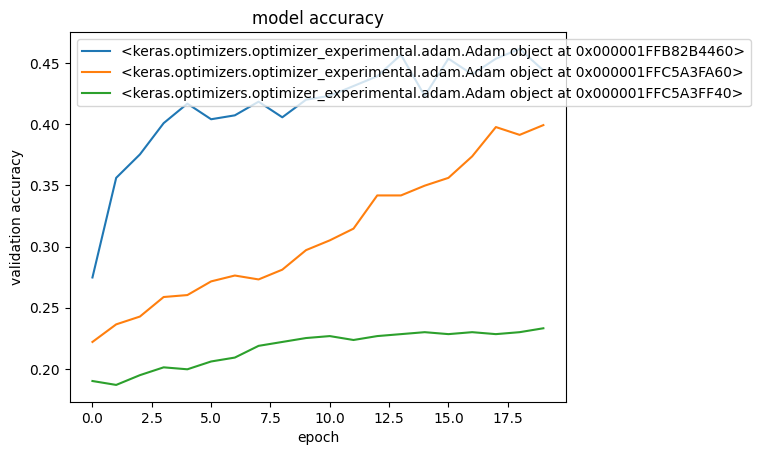

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
optimizers = []
# optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)

learning_rates = [1e-3, 1e-4, 1e-5]
for learning_rate in learning_rates:
    optimizers.append(tf.keras.optimizers.Adam(learning_rate))

histories, test_accuracies = LSTM_train_model_plot(X_train, y_train, epoch = 20, batch_size = 96, validation_split = 0.05, num_classes = num_classes, optimizers = optimizers, n_mfcc=13)



### Allons plus loin avec learning_rate = 1e-5 (on va prendre davantage d'epoch du coup)

Epoch 1/80
124/124 [==============================] - 31s 75ms/step - loss: 1.8669 - accuracy: 0.1687 - val_loss: 1.8884 - val_accuracy: 0.1693
Epoch 2/80
124/124 [==============================] - 9s 71ms/step - loss: 1.8498 - accuracy: 0.1772 - val_loss: 1.8772 - val_accuracy: 0.1629
Epoch 3/80
124/124 [==============================] - 8s 68ms/step - loss: 1.8352 - accuracy: 0.1853 - val_loss: 1.8677 - val_accuracy: 0.1613
Epoch 4/80
124/124 [==============================] - 7s 57ms/step - loss: 1.8222 - accuracy: 0.1928 - val_loss: 1.8601 - val_accuracy: 0.1645
Epoch 5/80
124/124 [==============================] - 7s 57ms/step - loss: 1.8105 - accuracy: 0.1982 - val_loss: 1.8531 - val_accuracy: 0.1661
Epoch 6/80
124/124 [==============================] - 7s 56ms/step - loss: 1.7997 - accuracy: 0.2056 - val_loss: 1.8467 - val_accuracy: 0.1821
Epoch 7/80
124/124 [==============================] - 7s 55ms/step - loss: 1.7898 - accuracy: 0.2112 - val_loss: 1.8409 - val_accuracy: 0.182

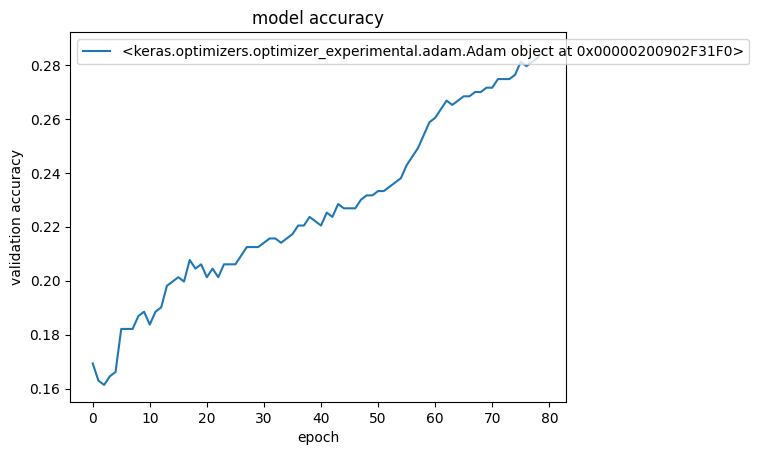

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

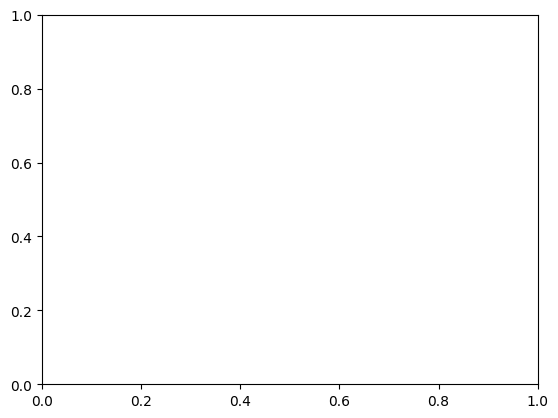

In [ ]:
optimizers = []
# optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)

learning_rates = [1e-5]
for learning_rate in learning_rates:
    optimizers.append(tf.keras.optimizers.Adam(learning_rate))

histories, test_accuracies = LSTM_train_model_plot(X_train, y_train, epoch = 80, batch_size = 96, validation_split = 0.05, num_classes = num_classes, optimizers = optimizers, n_mfcc=13)



### Essayons d'aller plus loin avec learning_rates 1e-4 déjà, au moins aller jusqu'à la stabilisation

Epoch 1/80
124/124 [==============================] - 17s 87ms/step - loss: 1.8159 - accuracy: 0.1961 - val_loss: 1.7779 - val_accuracy: 0.2236
Epoch 2/80
124/124 [==============================] - 10s 80ms/step - loss: 1.7309 - accuracy: 0.2578 - val_loss: 1.7499 - val_accuracy: 0.2524
Epoch 3/80
124/124 [==============================] - 10s 83ms/step - loss: 1.6745 - accuracy: 0.2981 - val_loss: 1.7283 - val_accuracy: 0.2556
Epoch 4/80
124/124 [==============================] - 9s 76ms/step - loss: 1.6273 - accuracy: 0.3362 - val_loss: 1.7108 - val_accuracy: 0.2780
Epoch 5/80
124/124 [==============================] - 14s 112ms/step - loss: 1.5841 - accuracy: 0.3719 - val_loss: 1.6947 - val_accuracy: 0.2875
Epoch 6/80
124/124 [==============================] - 16s 128ms/step - loss: 1.5423 - accuracy: 0.4022 - val_loss: 1.6768 - val_accuracy: 0.3083
Epoch 7/80
124/124 [==============================] - 14s 114ms/step - loss: 1.5007 - accuracy: 0.4325 - val_loss: 1.6609 - val_accurac

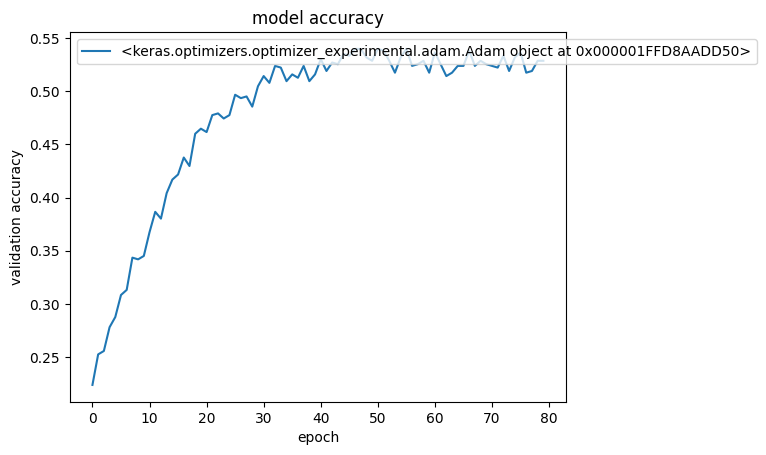

In [ ]:
optimizers = []
# optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)

learning_rates = [1e-4]
for learning_rate in learning_rates:
    optimizers.append(tf.keras.optimizers.Adam(learning_rate))

histories, test_accuracies = LSTM_train_model_plot(X_train, y_train, epoch = 80, batch_size = 96, validation_split = 0.05, num_classes = num_classes, optimizers = optimizers, n_mfcc=13)


Epoch 1/80
124/124 [==============================] - 17s 87ms/step - loss: 1.8159 - accuracy: 0.1961 - val_loss: 1.7779 - val_accuracy: 0.2236
Epoch 2/80
124/124 [==============================] - 10s 80ms/step - loss: 1.7309 - accuracy: 0.2578 - val_loss: 1.7499 - val_accuracy: 0.2524
Epoch 3/80
124/124 [==============================] - 10s 83ms/step - loss: 1.6745 - accuracy: 0.2981 - val_loss: 1.7283 - val_accuracy: 0.2556
Epoch 4/80
124/124 [==============================] - 9s 76ms/step - loss: 1.6273 - accuracy: 0.3362 - val_loss: 1.7108 - val_accuracy: 0.2780
Epoch 5/80
124/124 [==============================] - 14s 112ms/step - loss: 1.5841 - accuracy: 0.3719 - val_loss: 1.6947 - val_accuracy: 0.2875
Epoch 6/80
124/124 [==============================] - 16s 128ms/step - loss: 1.5423 - accuracy: 0.4022 - val_loss: 1.6768 - val_accuracy: 0.3083
Epoch 7/80
124/124 [==============================] - 14s 114ms/step - loss: 1.5007 - accuracy: 0.4325 - val_loss: 1.6609 - val_accurac

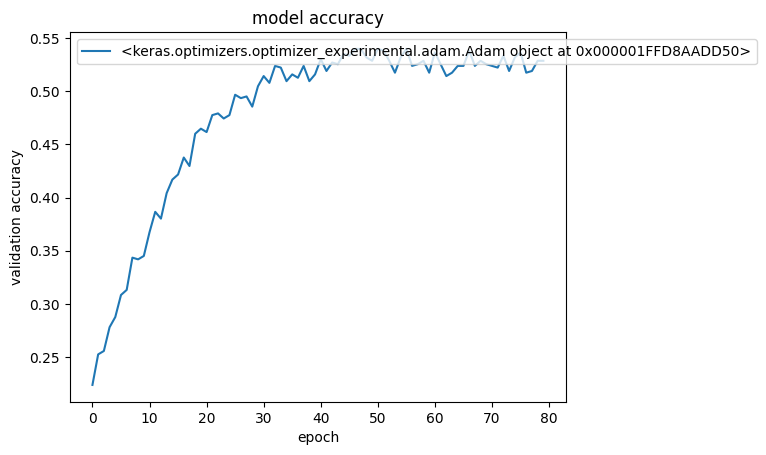

In [ ]:
optimizers = []
# optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)

learning_rates = [1e-4]
for learning_rate in learning_rates:
    optimizers.append(tf.keras.optimizers.Adam(learning_rate))

histories, test_accuracies = LSTM_train_model_plot(X_train, y_train, epoch = 80, batch_size = 96, validation_split = 0.05, num_classes = num_classes, optimizers = optimizers, n_mfcc=13)


### Y a du progèrs et stabilisation vers 52% pour val_accuracy et test_accuracy 
Testons avec learning_rate=e-5 et epochs =300
On peut utiliser "initial_epoch"

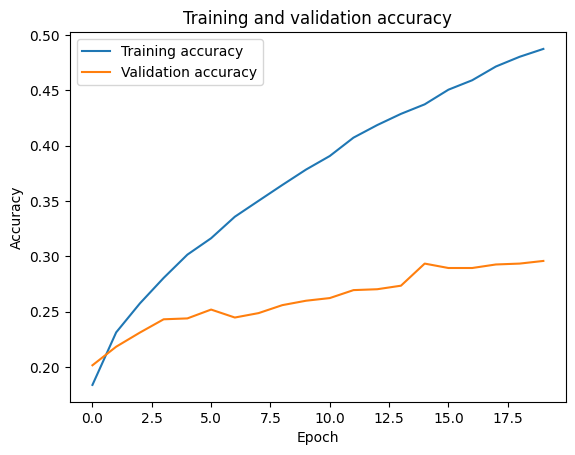

In [ ]:
#test avec initial_epoch, juste 1 epoch à partir du précédent model
# test_loss, test_acc = history.evaluate(X_test, y_test)
# print("Test accuracy of model with: ", test_acc)
# history
# history = history(X_train, y_train, epoch = 1, batch_size = 96, validation_split = 0.05, num_classes = num_classes, optimizers = optimizers, initial_epoch=20, n_mfcc=13)
# print(history.history['accuracy'])

# import matplotlib.pyplot as plt

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# plt.plot(acc, label='Training accuracy')
# plt.plot(val_acc, label='Validation accuracy')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and validation accuracy')
# plt.show()


Epoch 1/300
124/124 [==============================] - 30s 116ms/step - loss: 1.8804 - accuracy: 0.1659 - val_loss: 1.8651 - val_accuracy: 0.1629
Epoch 2/300
124/124 [==============================] - 7s 57ms/step - loss: 1.8585 - accuracy: 0.1739 - val_loss: 1.8499 - val_accuracy: 0.1693
Epoch 3/300
124/124 [==============================] - 7s 57ms/step - loss: 1.8411 - accuracy: 0.1808 - val_loss: 1.8387 - val_accuracy: 0.1709
Epoch 4/300
124/124 [==============================] - 7s 54ms/step - loss: 1.8264 - accuracy: 0.1880 - val_loss: 1.8300 - val_accuracy: 0.1757
Epoch 5/300
124/124 [==============================] - 7s 56ms/step - loss: 1.8136 - accuracy: 0.1961 - val_loss: 1.8226 - val_accuracy: 0.1789
Epoch 6/300
124/124 [==============================] - 7s 57ms/step - loss: 1.8021 - accuracy: 0.2025 - val_loss: 1.8163 - val_accuracy: 0.1837
Epoch 7/300
124/124 [==============================] - 7s 55ms/step - loss: 1.7917 - accuracy: 0.2129 - val_loss: 1.8114 - val_accurac

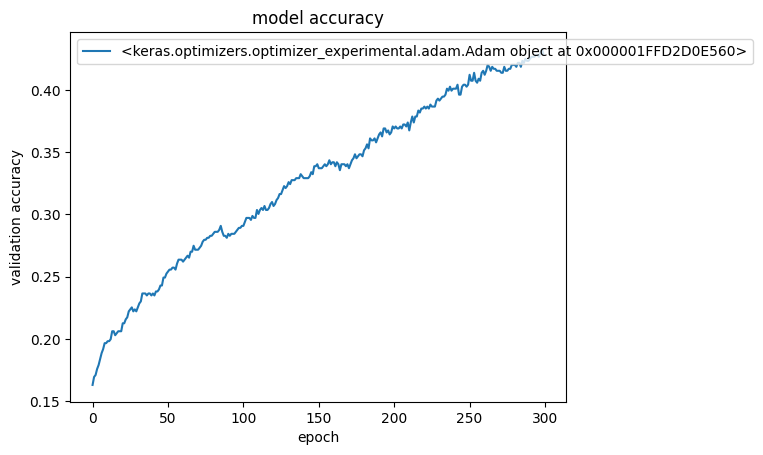

In [ ]:
optimizers = []

learning_rates = [1e-5]
for learning_rate in learning_rates:
    optimizers.append(tf.keras.optimizers.Adam(learning_rate))

histories, test_accuracies = LSTM_train_model_plot(X_train, y_train, epoch = 300, batch_size = 96, validation_split = 0.05, num_classes = num_classes, optimizers = optimizers, n_mfcc=13)


In [ ]:
test_accuracies


[0.4421279728412628]